# Carregamento e exploração dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
base_reservations = pd.read_csv('../data/Hotel Reservations.csv')
base_reservations

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
base_reservations.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
#verifica se há valores nulos na base de dados
base_reservations.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# Tratamento dos dados

In [5]:
#função para atribuir os rótulos com base nos valores de 'avg_price_per_room'
def assign_label(avg_price):
    if avg_price <= 85:
        return 1
    elif 85 < avg_price < 115:
        return 2
    else:
        return 3

base_reservations['label_avg_price_per_room'] = base_reservations['avg_price_per_room'].apply(assign_label)
base_reservations

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,label_avg_price_per_room
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,3
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,2


In [6]:
base_reservations.drop(columns = ['Booking_ID', 'avg_price_per_room'], axis = 1, inplace = True)
base_reservations.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'booking_status', 'label_avg_price_per_room'],
      dtype='object')

In [7]:
colunas = []
colunas.append('label_avg_price_per_room')
for i in range(len(base_reservations.columns[:-1])):
    # print(i)
    # print(base_reservations.columns[i]
    colunas.append(base_reservations.columns[i])

colunas

['label_avg_price_per_room',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'booking_status']

In [8]:
base_reservations = base_reservations[colunas]
base_reservations

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,1,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,Not_Canceled
1,2,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,Not_Canceled
2,1,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,Canceled
3,2,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,Canceled
4,2,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,1,Not_Canceled
36271,2,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,2,Canceled
36272,2,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,2,Not_Canceled
36273,2,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,0,Canceled


In [9]:
# OneHotEncoder - variáveis dummies
np.unique(base_reservations['type_of_meal_plan'], return_counts = True)
# np.unique(base_reservations['room_type_reserved'], return_counts = True)
# np.unique(base_reservations['market_segment_type'], return_counts = True)
# np.unique(base_reservations['booking_status'], return_counts = True)

(array(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'],
       dtype=object),
 array([27835,  3305,     5,  5130], dtype=int64))

In [10]:
#cria uma nova coluna para cada valor dentro das colunas categóricas
base_reservations = pd.get_dummies(base_reservations, prefix = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'],
                                  columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])
base_reservations

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,1,2,0,1,2,0,224,2017,10,2,...,False,False,False,False,False,False,True,False,False,True
1,2,2,0,2,3,0,5,2018,11,6,...,False,False,False,False,False,False,False,True,False,True
2,1,1,0,2,1,0,1,2018,2,28,...,False,False,False,False,False,False,False,True,True,False
3,2,2,0,0,2,0,211,2018,5,20,...,False,False,False,False,False,False,False,True,True,False
4,2,2,0,1,1,0,48,2018,4,11,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,3,0,2,6,0,85,2018,8,3,...,False,False,False,False,False,False,False,True,False,True
36271,2,2,0,1,3,0,228,2018,10,17,...,False,False,False,False,False,False,False,True,True,False
36272,2,2,0,2,6,0,148,2018,7,1,...,False,False,False,False,False,False,False,True,False,True
36273,2,2,0,0,3,0,63,2018,4,21,...,False,False,False,False,False,False,False,True,True,False


In [11]:
base_reservations.columns

Index(['label_avg_price_per_room', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights',
       'required_car_parking_space', 'lead_time', 'arrival_year',
       'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Canceled',
       'booking_status_Not

# Confronto dos dados para identificação dos atributos com maior relevância

<Axes: >

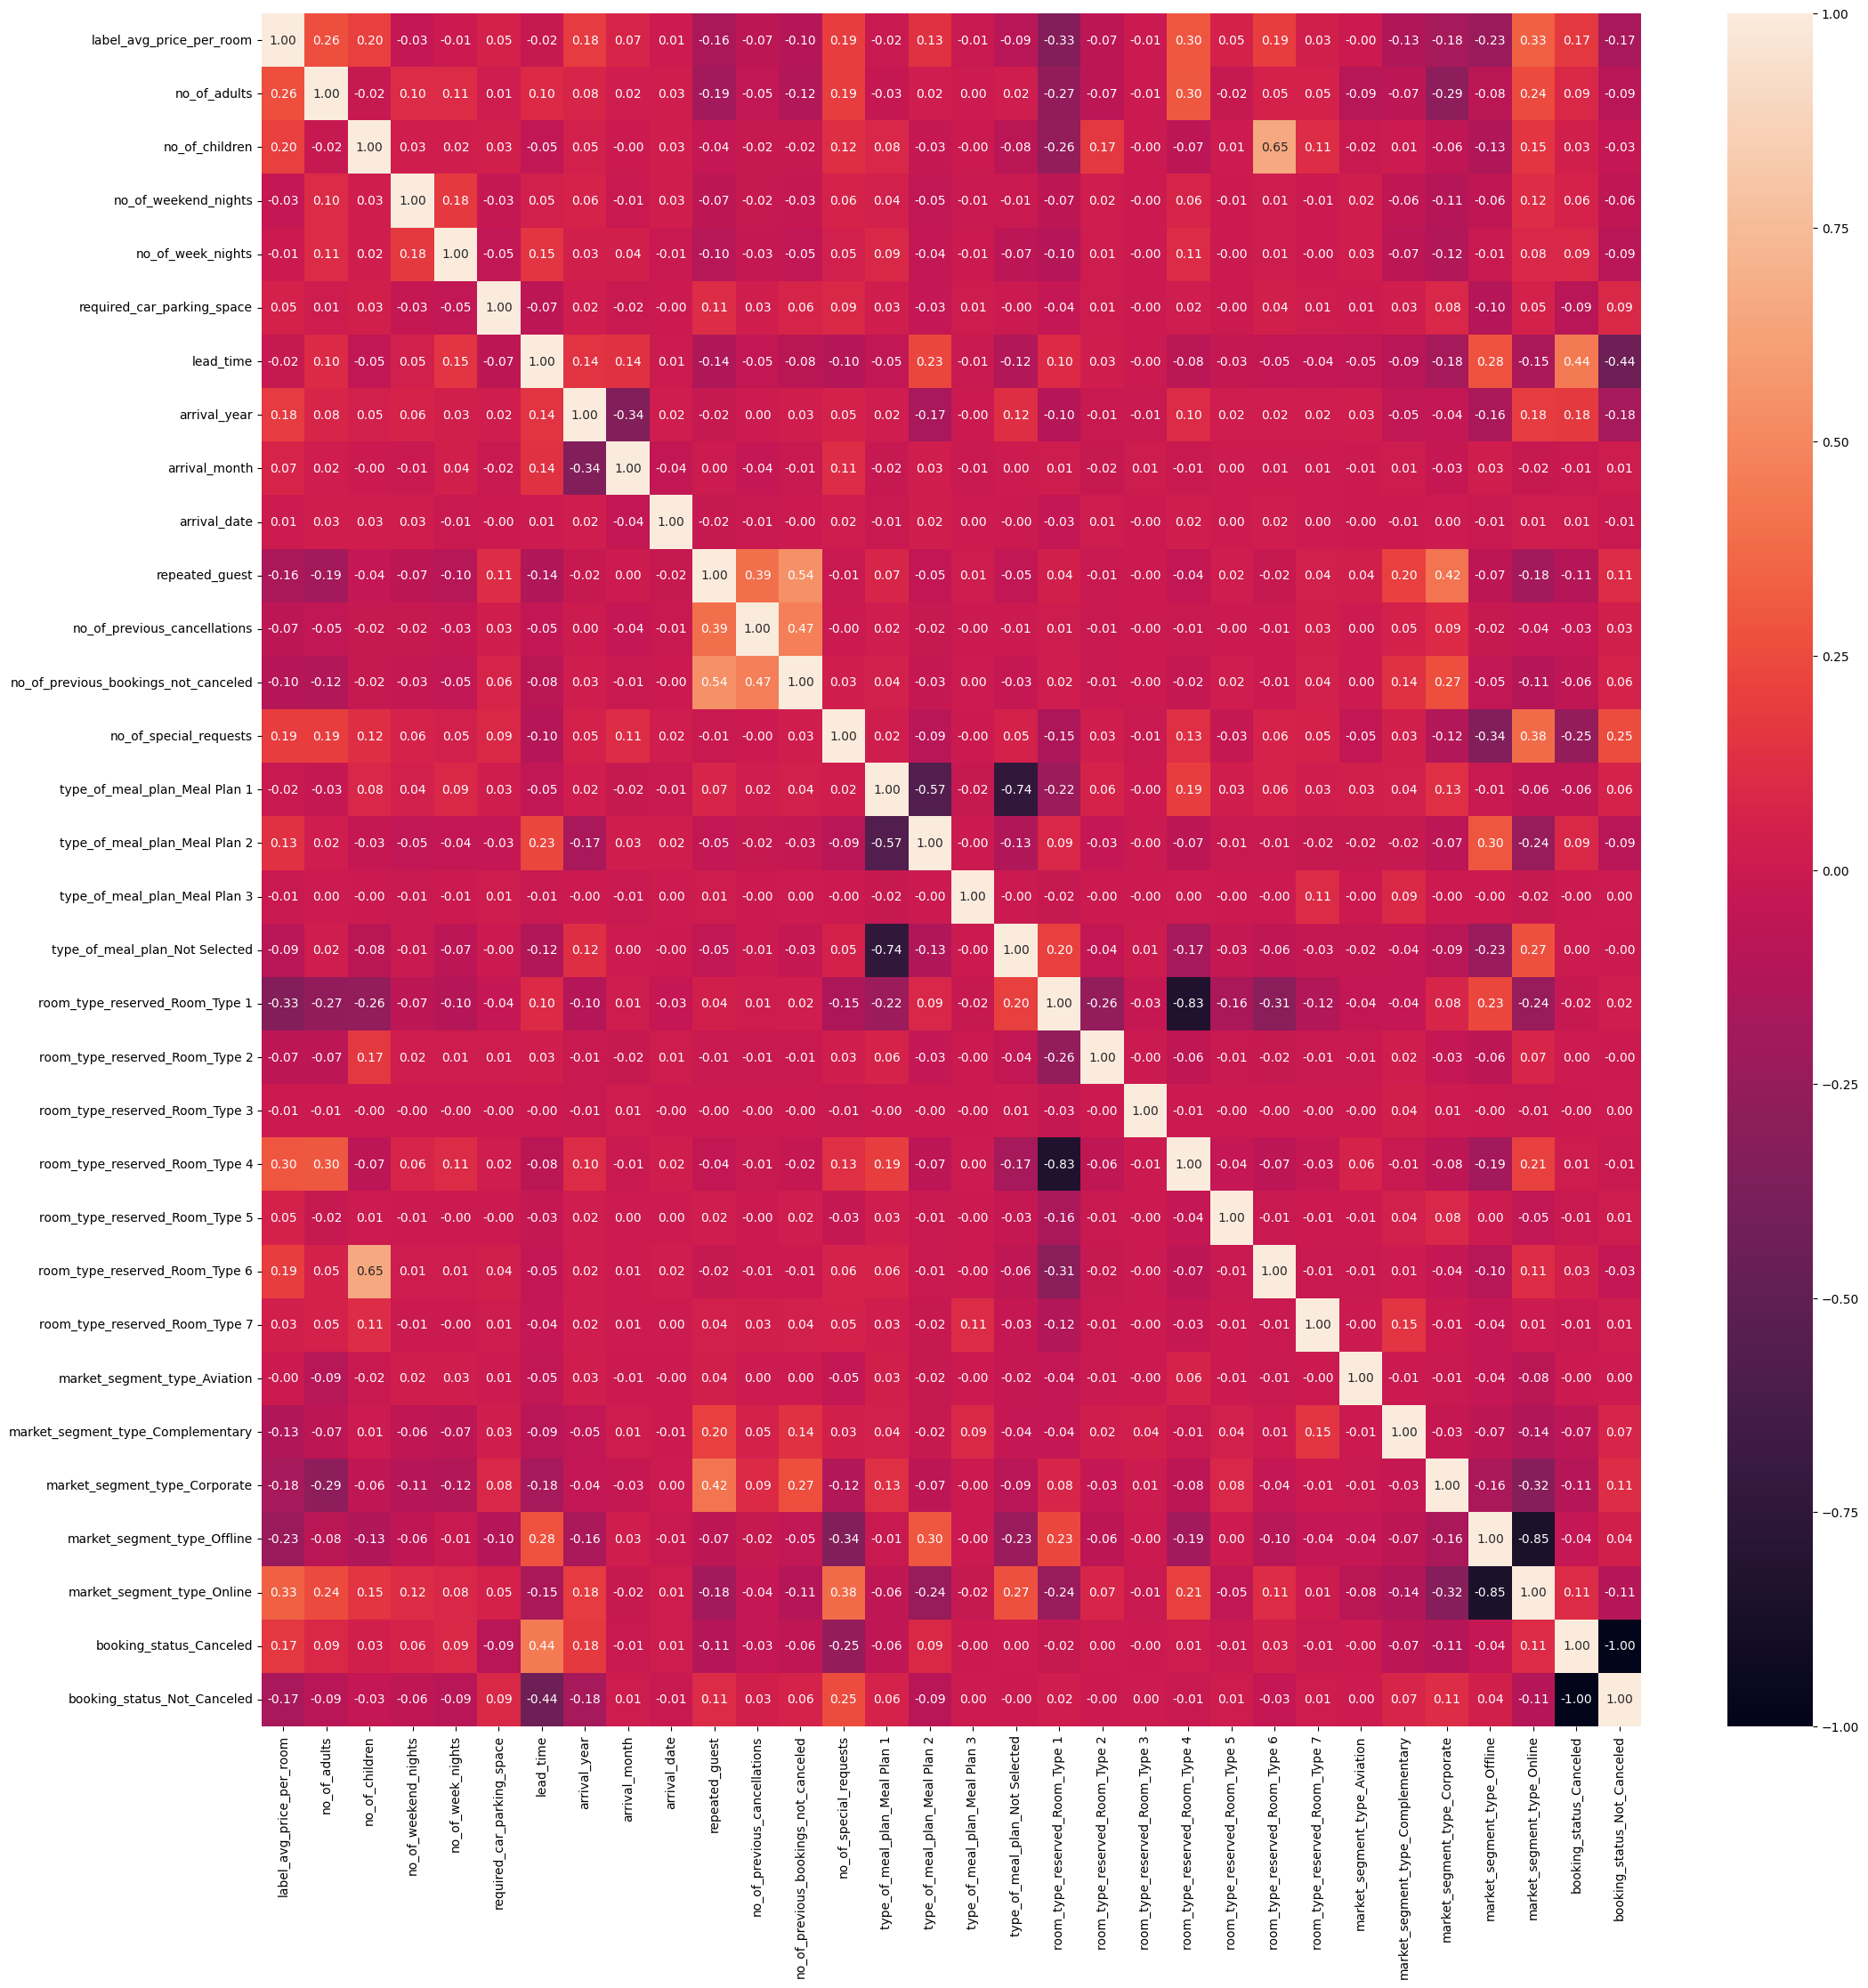

In [12]:
figura = plt.figure(figsize=(25,25))
sns.heatmap(base_reservations.corr(), annot=True, fmt='.2f')

In [13]:
base_reservations = base_reservations.drop(columns=['market_segment_type_Offline', 'room_type_reserved_Room_Type 1', 'market_segment_type_Corporate', 'booking_status_Not_Canceled'])

# Separação de dados entre treino e teste

In [14]:
X = base_reservations.iloc[:, 1:]
y = base_reservations.iloc[:, 0].values

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [15]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25)

X_treinamento.shape, y_treinamento.shape

((27206, 27), (27206,))

# Configurações do SageMaker

In [16]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [17]:
import boto3
import sagemaker

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\rafae\AppData\Local\sagemaker\sagemaker\config.yaml


In [18]:
session = sagemaker.Session()
bucket = os.getenv('AWS_S3_BUCKET')
subpasta_modelo = 'modelos/hotel-room/linearlearner'
subpasta_dataset_treinamento = 'datasets/hotel-room/train'
role = os.getenv("AWS_SAGEMAKER_EXECUTION_ROLE")
region = os.getenv("AWS_DEFAULT_REGION") or 'us-east-1'

train_data = f's3://{bucket}/{subpasta_dataset_treinamento}/hotel-room-train'
output_location = f's3://{bucket}/{subpasta_modelo}/output'

role, region

('arn:aws:iam::471112686336:role/service-role/SageMaker-Rafael', 'us-east-1')

In [19]:
import sagemaker.amazon.common as smac
import io

buffer = io.BytesIO()

smac.write_numpy_to_dense_tensor(buffer, X_treinamento, y_treinamento)
buffer.seek(0)
boto3.resource('s3').Bucket(bucket).Object(f'{subpasta_dataset_treinamento}/hotel-room-train').upload_fileobj(buffer)

# Treinamento do Linear Learner

In [20]:
container = sagemaker.image_uris.retrieve(
    framework='linear-learner',
    region=region
)

model = sagemaker.estimator.Estimator(
    container,
    role,
    train_instance_count=1,
    train_instance_type='ml.m4.xlarge',
    output_path=output_location,
    sagemaker_session=session,
    use_stop_instances=True
)

model.set_hyperparameters(feature_dim=27, predictor_type='regressor')

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [21]:
model.fit({"train": train_data})

INFO:sagemaker:Creating training-job with name: linear-learner-2024-03-21-11-19-42-590


2024-03-21 11:19:57 Starting - Starting the training job...
2024-03-21 11:20:12 Starting - Preparing the instances for training...
2024-03-21 11:20:53 Downloading - Downloading input data...
2024-03-21 11:21:26 Downloading - Downloading the training image......
2024-03-21 11:22:47 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/21/2024 11:23:00 INFO 139756630169408] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': '

# Deploy, previsões e avaliação usando Linear Learner

In [22]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

predictor = model.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    serializer=CSVSerializer(),
    deserializer=JSONDeserializer(),
)

INFO:sagemaker:Creating model with name: linear-learner-2024-03-21-11-23-37-118
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-03-21-11-23-37-118
INFO:sagemaker:Creating endpoint with name linear-learner-2024-03-21-11-23-37-118


-------!

In [23]:
p = predictor.predict(X_teste)
predictions = [round(prediction["score"]) for prediction in p["predictions"]]
predictions

[3,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 3,
 3,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,


0.5408534568309626


<Axes: >

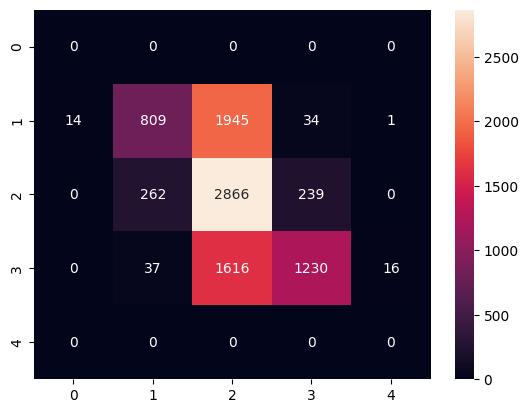

In [24]:
from sklearn.metrics import confusion_matrix

acertos = [predictions == y_teste]

print(np.sum(acertos) / len(predictions))
sns.heatmap(confusion_matrix(y_teste, predictions), annot=True, fmt='g')

In [25]:
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-03-21-11-23-37-118
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-03-21-11-23-37-118
